<a href="https://colab.research.google.com/github/ifanirmala/data-analyst-prediksi-harga-saham-PT-Telkom-Indonesia/blob/main/Ifa_Nirmala_prediksi_harga_saham.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Business Understanding**

**Problem Statement**

> Membuat prediksi harga saham PT Telkom Indonesia (Persero) Tbk. berdasarkan dataset yang ada.

**Goal**
> Memprediksi harga saham TLKM

**Solution**
> Karena dataset terkait hanya berisi tentang data tanggal dan harga, maka solusi yang sangat tepat untuk masalah ini adalah dengan menggunakan pendekatan Time Series.

In [ ]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Import all required libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Importing layers from keras. Use LSTM for input layer, and Dense for hidden and output layer
from keras.layers import Dense, LSTM, Dropout
from keras.models import Sequential

# Import Adam Optimizers
from tensorflow.keras.optimizers import Adam

# Import for splitting test and training data set
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import seaborn as sns

from keras.callbacks import  EarlyStopping
import opendatasets as od


# Data Understanding



Untuk submission ini, saya mengambil data dari [Kaggle](https://www.kaggle.com) yang bernama **[Indonesian Government Owned Company Stock Price](https://www.kaggle.com/fawwazzainiahmad/indonesian-government-owned-company-stock-price?select=TLKM.JK.csv)**. Berikut adalah daftar kolom di file CSV yang tersedia:

  * Date - Tanggal trading saham TLKM (datatype : string object)
  * Open - Harga ketika pertama kali diumumkan di tanggal tersebut (datatype : float64)
  * High - Harga tertinggi di tanggal tersebut (datatype : float64)
  * Low -  Harga terendah di tanggal tersebut (datatype : float64)
  * Close - Harga saham ketika diakhir period (datatype : float64)
  * Adj Close - Close value setelah mempertimbangkan dividen dan stock split (datatype : float64)
  * Volume - Jumlah transaksi saham di tanggal tersebut (datatype : float64)

In [ ]:
df = pd.read_csv('TLKM.JK.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-02,3980.0,3980.0,3980.0,3980.0,3310.131592,0.0
1,2017-01-03,3950.0,3990.0,3920.0,3950.0,3285.180664,71660600.0
2,2017-01-04,3880.0,3980.0,3880.0,3950.0,3285.180664,68494500.0
3,2017-01-05,3960.0,4030.0,3940.0,3950.0,3285.180664,74018400.0
4,2017-01-06,3970.0,4010.0,3960.0,4000.0,3326.765381,44136900.0
...,...,...,...,...,...,...,...
1417,2022-08-26,4510.0,4540.0,4480.0,4490.0,4490.000000,184317100.0
1418,2022-08-29,4370.0,4550.0,4360.0,4520.0,4520.000000,101529800.0
1419,2022-08-30,4580.0,4620.0,4480.0,4480.0,4480.000000,118884300.0
1420,2022-08-31,4420.0,4600.0,4420.0,4560.0,4560.000000,175300400.0


In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
print("Total Data : {} \n".format(len(df)))


Total Data : 1422 



In [ ]:
print("Total Data : {} \n".format(len(df)))
print("Date range from : {} to {}".format(df.head(1)['Date'].values, df.tail(1)['Date'].values))

Total Data : 1422 

Date range from : ['2017-01-02'] to ['2022-09-01']


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1422 entries, 0 to 1421
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1422 non-null   object 
 1   Open       1421 non-null   float64
 2   High       1421 non-null   float64
 3   Low        1421 non-null   float64
 4   Close      1421 non-null   float64
 5   Adj Close  1421 non-null   float64
 6   Volume     1421 non-null   float64
dtypes: float64(6), object(1)
memory usage: 77.9+ KB


In [ ]:
df_new = df.dropna(how='any',axis=0)
df_new

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-02,3980.0,3980.0,3980.0,3980.0,3310.131592,0.0
1,2017-01-03,3950.0,3990.0,3920.0,3950.0,3285.180664,71660600.0
2,2017-01-04,3880.0,3980.0,3880.0,3950.0,3285.180664,68494500.0
3,2017-01-05,3960.0,4030.0,3940.0,3950.0,3285.180664,74018400.0
4,2017-01-06,3970.0,4010.0,3960.0,4000.0,3326.765381,44136900.0
...,...,...,...,...,...,...,...
1417,2022-08-26,4510.0,4540.0,4480.0,4490.0,4490.000000,184317100.0
1418,2022-08-29,4370.0,4550.0,4360.0,4520.0,4520.000000,101529800.0
1419,2022-08-30,4580.0,4620.0,4480.0,4480.0,4480.000000,118884300.0
1420,2022-08-31,4420.0,4600.0,4420.0,4560.0,4560.000000,175300400.0


In [ ]:
df_new.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1.421000e+03
mean,3827.741027,3869.106263,3785.608726,3827.171006,3416.287764,1.021061e+08
std,490.449096,487.302987,492.470774,492.369542,462.616891,6.629501e+07
min,2550.000000,2590.000000,2450.000000,2560.000000,2289.641846,0.000000e+00
25%,3450.000000,3490.000000,3400.000000,3450.000000,3111.957031,6.168190e+07
50%,3870.000000,3900.000000,3840.000000,3870.000000,3357.914063,8.730300e+07
75%,4190.000000,4220.000000,4150.000000,4190.000000,3708.230957,1.234112e+08
max,4850.000000,4850.000000,4780.000000,4800.000000,4750.000000,6.241426e+08


Sebelum menyajikan grafik dalam bentuk lineplot, karena column 'Date' masih berupa object string, maka harus diubah dahulu ke dateformat.
Ini perlu dilakukan karena kita ingin melihat perkembangan harga nya dari tahun ke tahun, bukan dari hari ke hari.

In [ ]:
df.isnull().sum()/len(df)

Date         0.000000
Open         0.000703
High         0.000703
Low          0.000703
Close        0.000703
Adj Close    0.000703
Volume       0.000703
dtype: float64

In [ ]:
print(df.head())

# Print last 5 rows of the dataframe
print(df.tail())

# Print 5 random rows from the dataframe
print(df.sample(5))

         Date    Open    High     Low   Close    Adj Close      Volume
0  2017-01-02  3980.0  3980.0  3980.0  3980.0  3310.131592         0.0
1  2017-01-03  3950.0  3990.0  3920.0  3950.0  3285.180664  71660600.0
2  2017-01-04  3880.0  3980.0  3880.0  3950.0  3285.180664  68494500.0
3  2017-01-05  3960.0  4030.0  3940.0  3950.0  3285.180664  74018400.0
4  2017-01-06  3970.0  4010.0  3960.0  4000.0  3326.765381  44136900.0
            Date    Open    High     Low   Close  Adj Close       Volume
1417  2022-08-26  4510.0  4540.0  4480.0  4490.0     4490.0  184317100.0
1418  2022-08-29  4370.0  4550.0  4360.0  4520.0     4520.0  101529800.0
1419  2022-08-30  4580.0  4620.0  4480.0  4480.0     4480.0  118884300.0
1420  2022-08-31  4420.0  4600.0  4420.0  4560.0     4560.0  175300400.0
1421  2022-09-01  4560.0  4650.0  4530.0  4580.0     4580.0  120871700.0
           Date    Open    High     Low   Close    Adj Close       Volume
124  2017-07-03  4530.0  4790.0  4520.0  4790.0  4092.724609  

In [ ]:
print(df.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [ ]:
print(df.dtypes)

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object


In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

# Print the updated dataframe
print(df.head())

        Date    Open    High     Low   Close    Adj Close      Volume
0 2017-01-02  3980.0  3980.0  3980.0  3980.0  3310.131592         0.0
1 2017-01-03  3950.0  3990.0  3920.0  3950.0  3285.180664  71660600.0
2 2017-01-04  3880.0  3980.0  3880.0  3950.0  3285.180664  68494500.0
3 2017-01-05  3960.0  4030.0  3940.0  3950.0  3285.180664  74018400.0
4 2017-01-06  3970.0  4010.0  3960.0  4000.0  3326.765381  44136900.0


Dalam proses data understanding, saya menggunakan visualisasi data berupa grafik karena saya ingin mengetahui perkembangan harga saham TLKM dari dataset dan periode yang ada

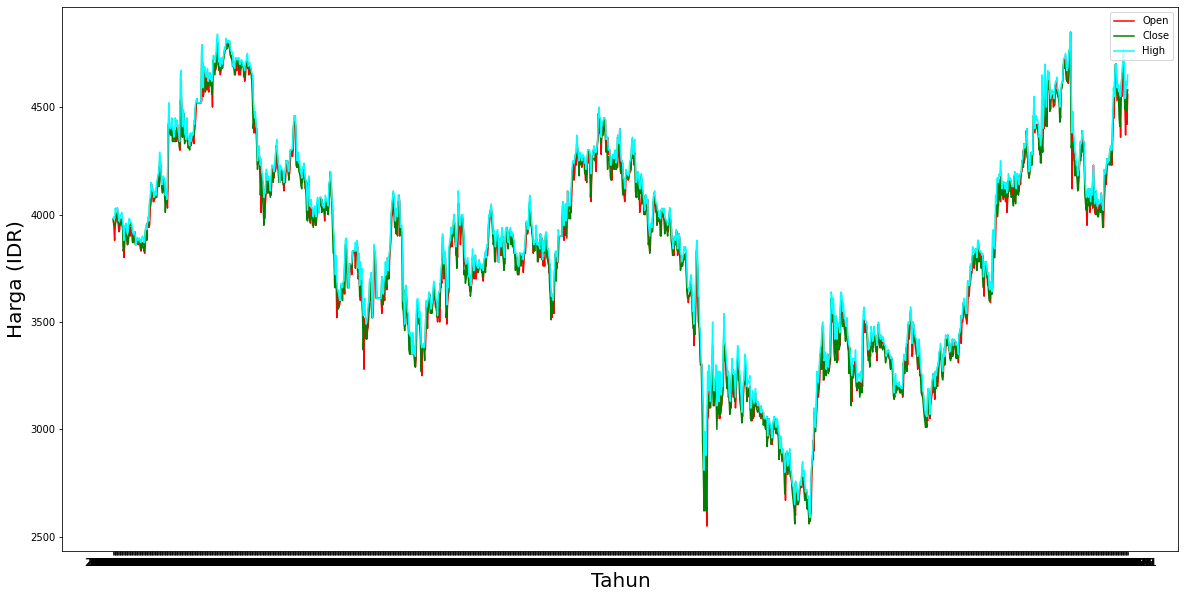

In [ ]:
visual_plot =df_new[['Date','Close', 'Open', 'High']]

plt.figure(figsize=(20,10))

sns.lineplot(y=visual_plot['Open'], color="r", x=visual_plot['Date'])
sns.lineplot(y=visual_plot['Close'], color="g", x=visual_plot['Date'])
sns.lineplot(y=visual_plot['High'], color="cyan", x=visual_plot['Date'])

plt.xlabel('Tahun', fontsize=20)
plt.ylabel('Harga (IDR)', fontsize=20)
plt.legend(['Open','Close','High'], loc='upper right')



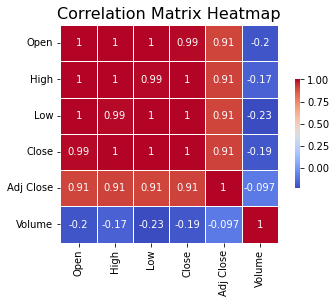

In [ ]:
# Correlation between different variables
corr = df.corr()
sns.heatmap(data=corr, annot=True, cmap='coolwarm', linewidths=0.5,
            square=True, cbar_kws={'shrink': 0.5})
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.show()

Berdasarkan heatplot tersebut, dapat ditarik kesimpulan bahwa fitur yang memiliki korelasi rendah adalah kolom Volume. Untuk prediksi harga, tentu kita harus memilih antara kolom Open, High, Low, dan Close. Namun, dengan adanya reduksi dimensi, kita dapat menyederhanakan harga tersebut menjadi harga final pada hari itu juga.  Proses reduksi dimensi ini akan dilakukan di tahap Data Preparation menggunakan teknik PCA



# **Data Preparation**

Memastikan bahwa dataset aman dari missing values dan tidak terdapat duplikasi

In [ ]:
df_new.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
check_duplicates = df_new[df_new.duplicated()]
print(check_duplicates)

Empty DataFrame
Columns: [Date, Open, High, Low, Close, Adj Close, Volume]
Index: []


In [ ]:
df_new_dropped = df_new.drop(['Volume'], axis=1)

Reduksi Dimensi dengan PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1, random_state=123)
pca.fit(df_new_dropped[['Low', 'Open','High','Close', 'Adj Close']])

df_new_dropped['dimension'] = pca.transform(df_new_dropped.loc[:, ('Low', 'Open','High','Close', 'Adj Close')]).flatten()
df_new_dropped.drop(['Low', 'Open','High','Close', 'Adj Close'], axis=1, inplace=True)

df_new_dropped

,Date,dimension
0,2017-01-02,-236.000048
1,2017-01-03,-175.448458
2,2017-01-04,-120.624422
3,2017-01-05,-207.348476
4,2017-01-06,-251.819382
...,...,...
1417,2022-08-26,-1674.366650
1418,2022-08-29,-1585.944113
1419,2022-08-30,-1733.993424
1420,2022-08-31,-1693.568245


In [ ]:
df_new_dropped.index = df_new_dropped['Date']
df_new_dropped = df_new_dropped.drop(columns='Date')
df_new_dropped

,dimension
Date,
2017-01-02,-236.000048
2017-01-03,-175.448458
2017-01-04,-120.624422
2017-01-05,-207.348476
2017-01-06,-251.819382
...,...
2022-08-26,-1674.366650
2022-08-29,-1585.944113
2022-08-30,-1733.993424


In [ ]:
  # Splitting dataset
train_set = df_new_dropped[:int(len(df_new_dropped)*0.8) :]
test_set = df_new_dropped[int(len(df_new_dropped)*0.8):len(df_new_dropped) :]

In [ ]:
train_set

,dimension
Date,
2017-01-02,-236.000048
2017-01-03,-175.448458
2017-01-04,-120.624422
2017-01-05,-207.348476
2017-01-06,-251.819382
...,...
2021-06-28,1269.423436
2021-06-29,1314.476346
2021-06-30,1386.735877


In [ ]:
test_set

,dimension
Date,
2021-07-05,1612.682806
2021-07-06,1660.989556
2021-07-07,1648.522157
2021-07-08,1660.968117
2021-07-09,1478.819816
...,...
2022-08-26,-1674.366650
2022-08-29,-1585.944113
2022-08-30,-1733.993424


In [ ]:
def dataset_preparation(dataset, window):
    dframe = []
    label = []

    for i in range(len(dataset) - window - 1):
        data = dataset[i:(i + window), 0]
        dframe.append(data)
        label.append(dataset[i+window,0])
    return np.array(dframe), np.array(label)

In [ ]:
# MinMax Scaling
minmax_scaler = MinMaxScaler()
scaled_train_set = minmax_scaler.fit_transform(train_set)
scaled_test_set = minmax_scaler.fit_transform(test_set)

In [ ]:
# Prepare dataset with defined window size
x_train, y_train = dataset_preparation(scaled_train_set,80)
x_test, y_test = dataset_preparation(scaled_test_set,80)


In [ ]:
# Reshaping
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
x_test = np.reshape(x_test, (x_test.shape[0], x_train.shape[1],1))

In [ ]:
print("\n----MinMax Scaled Data----")
print("All data : {}".format(len(scaled_train_set)))

print("\n----Splitted Data----")
print("Train Set shapes : {} {}".format(x_train.shape, y_train.shape))
print("Test Set shapes : {} {}".format(x_test.shape, y_test.shape))


----MinMax Scaled Data----
All data : 1136

----Splitted Data----
Train Set shapes : (1055, 80, 1) (1055,)
Test Set shapes : (204, 80, 1) (204,)


# **Arsitektur Model**

Penggunaan LSTM sebagai input layer, Dropout sebagai hidden layer, dan Dense  sebagai output layer

In [ ]:
# Arsitektur Model
model = Sequential([
  LSTM(40),
  Dropout(0.5),
  Dense(32),
  Dense(1),
])

Menggunakan Adam Optimizer dengan learning rate 0.01. Menggunakan Mean Absolute Error (MAE) metrics dan Mean Squared Error (MSE) sebagai loss function

In [ ]:
# Setting optimizer SGD Optimizer and learning rate
optimizer = Adam(learning_rate=0.01)

# Compile model with Huber and MAE (Mean Absolute Error) metrics
model.compile(
    metrics=["mae"],
    optimizer=optimizer,
    loss='mean_squared_error')

# **Model Training for Deep Learning**

Inisiasi Callback, EarlyStopping dari library Keras memudahkan kita untuk menghentikan proses training ketika hasil metric yang sedang dimonitor tidak ada perkembangan performa selama 5 epoch

In [ ]:
callbacks = EarlyStopping(
    min_delta=0.01,
    patience=5,
    restore_best_weights=True,
)

In [ ]:
# Training Model and save it to history variable.
history = model.fit(x_train,
                    y_train,
                    epochs=20,
                    validation_data=(x_test, y_test),
                    callbacks=[callbacks])

Epoch 1/20
33/33 [==============================] - 5s 47ms/step - loss: 0.0309 - mae: 0.1230 - val_loss: 0.0037 - val_mae: 0.0466
Epoch 2/20
33/33 [==============================] - 1s 29ms/step - loss: 0.0052 - mae: 0.0545 - val_loss: 0.0046 - val_mae: 0.0549
Epoch 3/20
33/33 [==============================] - 1s 30ms/step - loss: 0.0038 - mae: 0.0466 - val_loss: 0.0030 - val_mae: 0.0416
Epoch 4/20
33/33 [==============================] - 1s 29ms/step - loss: 0.0036 - mae: 0.0452 - val_loss: 0.0028 - val_mae: 0.0403
Epoch 5/20
33/33 [==============================] - 1s 46ms/step - loss: 0.0035 - mae: 0.0447 - val_loss: 0.0025 - val_mae: 0.0385
Epoch 6/20
33/33 [==============================] - 2s 50ms/step - loss: 0.0031 - mae: 0.0435 - val_loss: 0.0024 - val_mae: 0.0360


# **Model Evaluation**

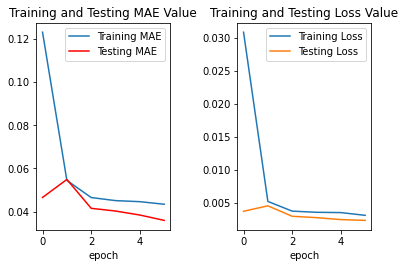

In [ ]:
# Create plot for mae and val_mae
figure, axes = plt.subplots(nrows=2, ncols=2)
figure.tight_layout(pad=3.0)

plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'], 'r')
plt.title('Training and Testing MAE Value')
plt.xlabel('epoch')
plt.legend(['Training MAE', 'Testing MAE'], loc='upper right')

# Create plot for loss and val_loss
plt.subplot(1, 2, 2) # index 2
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Testing Loss Value')
plt.xlabel('epoch')
plt.legend(['Training Loss', 'Testing Loss'], loc='upper right')

plt.show()

# **Model Prediction**

In [ ]:
predict_test = model.predict(x_test)
predict_test = minmax_scaler.inverse_transform(predict_test)
actual_test = minmax_scaler.inverse_transform([y_test])

7/7 [==============================] - 0s 8ms/step


Membuat dataframe baru untuk menyimpan prediction dan actual value, kemudian menambahkan kolom 'Date' dari variable df. Setelah semua kolom mempunyai data, kita dapat melihat harga asli dan prediksi harga dari data training yang telah dijalankan

In [ ]:
data_predict_and_actual = {'actual_value':actual_test[0], 'prediction_value' : predict_test[:,0]}

df_predict = pd.DataFrame(data_predict_and_actual)
df_predict['Date'] = df['Date'][:len(df_predict['actual_value'])]

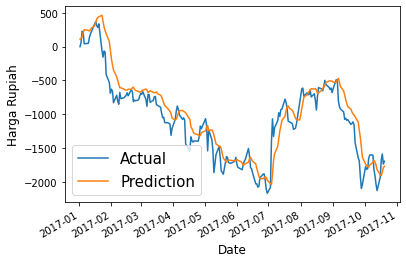

In [ ]:
df_predict.plot(x="Date" )
plt.ylabel('Harga Rupiah', size=12)

plt.xlabel('Date', size=12)
plt.xticks(rotation=30)

plt.legend(["Actual", "Prediction"], fontsize=15, loc='lower left')
plt.show();